In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,as_frame=False)

In [3]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [4]:
X = mnist.data/255
y = mnist.target

In [5]:
y = y.astype(int)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2325)


In [7]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier([12,6])
classifier.fit(X_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[12, 6])

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,classifier.predict(X_test))

0.9382142857142857

In [9]:
accuracy_score(y_train,classifier.predict(X_train))

0.9720535714285714

In [10]:
classifier2 = MLPClassifier([50,],verbose=1,max_iter=20)
classifier2.fit(X_train,y_train)

Iteration 1, loss = 0.55526431
Iteration 2, loss = 0.24875543
Iteration 3, loss = 0.19748636
Iteration 4, loss = 0.16542102
Iteration 5, loss = 0.14406268
Iteration 6, loss = 0.12905269
Iteration 7, loss = 0.11676783
Iteration 8, loss = 0.10701810
Iteration 9, loss = 0.09874034
Iteration 10, loss = 0.09189202
Iteration 11, loss = 0.08571248
Iteration 12, loss = 0.07876260
Iteration 13, loss = 0.07349092
Iteration 14, loss = 0.06857428
Iteration 15, loss = 0.06355597
Iteration 16, loss = 0.05975951
Iteration 17, loss = 0.05631568
Iteration 18, loss = 0.05261830
Iteration 19, loss = 0.04947755
Iteration 20, loss = 0.04683983


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[50], max_iter=20, verbose=1)

In [11]:
accuracy_score(y_test,classifier2.predict(X_test))

0.9697142857142858

In [12]:
import torch
import matplotlib.pyplot as plt

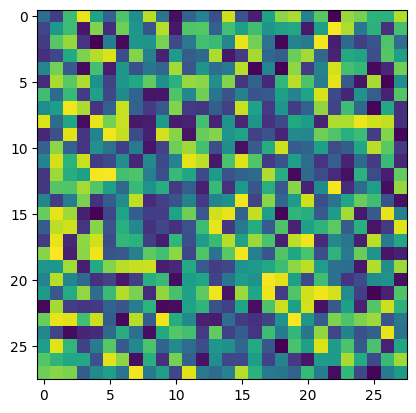

In [13]:
plt.imshow(torch.rand((4,28,28))[1])
plt.show()

In [14]:
torch.matrix_power(torch.tensor(([1,1],[1,0])),5)

tensor([[8, 5],
        [5, 3]])

In [15]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self,input_size):
        super(MLP,self).__init__()
        self.hidden_layer = nn.Linear(input_size,128)
        self.output = nn.Linear(128,1)
        self.activation = nn.ReLU()
    
    def forward(self,x):
        x = self.activation(self.hidden_layer(x))
        x = self.output(x)
        return x
    
model = MLP(input_size=10)
model


MLP(
  (hidden_layer): Linear(in_features=10, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=1, bias=True)
  (activation): ReLU()
)

In [16]:
model.forward(torch.rand((5,10)))

tensor([[0.2982],
        [0.2817],
        [0.3615],
        [0.2377],
        [0.3588]], grad_fn=<AddmmBackward0>)

In [17]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(),lr=0.01) #,momentum=0.9)


In [18]:
from torch.utils.data import Dataset

class NumberProductDataset(Dataset):
    def __init__(self,data_range=(1,10)):
        self.numbers = list(range(data_range[0],data_range[1]))
    
    def __getitem__(self,index):
        n1 = self.numbers[index]
        n2 = self.numbers[index]+1
        return (n1,n2),n1*n2
    
    def __len__(self):
        return len(self.numbers)
    

dataset = NumberProductDataset(data_range=(0,11))

dataset[3]

((3, 4), 12)

In [19]:
from torch.utils.data import DataLoader

dataset = NumberProductDataset(data_range=(0,5))
dataloader = DataLoader(dataset,batch_size=3,shuffle=True)

for (num_pairs,products) in dataloader:
    print(num_pairs,products)

[tensor([2, 4, 0]), tensor([3, 5, 1])] tensor([ 6, 20,  0])
[tensor([1, 3]), tensor([2, 4])] tensor([ 2, 12])


In [20]:
class NumberSumDataset(Dataset):
    def __init__(self,data_range=(1,10)):
        self.numbers = list(range(data_range[0],data_range[1]))
    
    def __getitem__(self, index):
        n1 = float(self.numbers[index//len(self.numbers)])
        n2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([n1,n2]),torch.tensor([n1+n2])
    
    def __len__(self):
        return len(self.numbers)**2

In [21]:
dataset = NumberSumDataset(data_range=(0,100))
dataloader = DataLoader(dataset,batch_size=100,shuffle=True)
model=MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [22]:
for epoch in range(10):
    loss = 0.0
    for n_p,sums in dataloader:
        predictions = model(n_p)
        ls=loss_function(predictions,sums)
        ls.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += ls.item()
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch,loss))

Epoch 0: Sum of Batch Losses = 305663.32942
Epoch 1: Sum of Batch Losses = 5895.68135
Epoch 2: Sum of Batch Losses = 1389.25043
Epoch 3: Sum of Batch Losses = 136.75708
Epoch 4: Sum of Batch Losses = 13.97746
Epoch 5: Sum of Batch Losses = 8.63720
Epoch 6: Sum of Batch Losses = 6.47426
Epoch 7: Sum of Batch Losses = 4.94725
Epoch 8: Sum of Batch Losses = 3.83149
Epoch 9: Sum of Batch Losses = 3.04065


In [23]:
pip install transformers


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer.vocab_size

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


30522

In [25]:
tokenizer.tokenize('I heart Generative AI')

['i', 'heart', 'genera', '##tive', 'ai']

In [26]:
from transformers import BertForSequenceClassification, BertTokenizer

model_name = 'textattack/bert-base-uncased-imdb'
model = BertForSequenceClassification.from_pretrained(model_name,num_labels=2)
tokenizer = BertTokenizer.from_pretrained(model_name)

In [27]:
?BertForSequenceClassification

Init signature: BertForSequenceClassification(config)
Docstring:     
Bert Model transformer with a sequence classification/regression head on top (a linear layer on top of the pooled
output) e.g. for GLUE tasks.


This model inherits from [`PreTrainedModel`]. Check the superclass documentation for the generic methods the
library implements for all its model (such as downloading or saving, resizing the input embeddings, pruning heads
etc.)

This model is also a PyTorch [torch.nn.Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) subclass.
Use it as a regular PyTorch Module and refer to the PyTorch documentation for all matter related to general usage
and behavior.

Parameters:
    config ([`BertConfig`]): Model configuration class with all the parameters of the model.
        Initializing with a config file does not load the weights associated with the model, only the
        configuration. Check out the [`~PreTrainedModel.from_pretrained`] method to load the model weight

In [28]:
inputs = tokenizer('I love Generative AI',return_tensors='pt')
with torch.no_grad():
    outputs = model(**inputs).logits
    probabs = torch.nn.functional.softmax(outputs,dim=1)
    predicted_class = torch.argmax(probabs)

if predicted_class==1:
    print(f'Sentiment : Positive ({probabs[0][1]*100:.2f}%)')
else:
    print(f'Sentimen : Negative ({probabs[0][0]*100: .2f}%)')

Sentiment : Positive (88.68%)


In [29]:
?torch.no_grad

Init signature: torch.no_grad() -> None
Docstring:     
Context-manager that disables gradient calculation.

Disabling gradient calculation is useful for inference, when you are sure
that you will not call :meth:`Tensor.backward()`. It will reduce memory
consumption for computations that would otherwise have `requires_grad=True`.

In this mode, the result of every computation will have
`requires_grad=False`, even when the inputs have `requires_grad=True`.
There is an exception! All factory functions, or functions that create
a new Tensor and take a requires_grad kwarg, will NOT be affected by
this mode.

This context manager is thread local; it will not affect computation
in other threads.

Also functions as a decorator.

.. note::
    No-grad is one of several mechanisms that can enable or
    disable gradients locally see :ref:`locally-disable-grad-doc` for
    more information on how they compare.

.. note::
    This API does not apply to :ref:`forward-mode AD <forward-mode-ad>`.
  

In [30]:
! pip install datasets


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [31]:
from datasets import load_dataset

dataset = load_dataset('imdb')

In [32]:
from IPython.display import HTML, display
review_number = 42
sample_review = dataset["train"][review_number]

display(HTML(sample_review["text"][:450] + "..."))

if sample_review["label"] == 1:
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")

Sentiment: Negative


In [34]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)

tokenier = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
def tokenize_function(examples):
    return tokenier(examples['text'],padding='max_length',truncation=True)

tokenized_datasets = dataset.map(tokenize_function,batched=True)

Map: 100%|██████████| 50000/50000 [03:19<00:00, 250.09 examples/s]


In [39]:
from transformers import TrainingArguments,Trainer

training_args = TrainingArguments(
    per_device_train_batch_size=64,
    output_dir='./results',
    learning_rate=2e-5,
    num_train_epochs=3
)

trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['test']
)

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`

In [40]:
# Fill in the missing parts labelled <MASK> with the appropriate code to complete the exercise.

# Hint: Use torch.cuda.is_available() to check if GPU is available

import torch

# Set the device to be used for the tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a tensor on the appropriate device
my_tensor = torch.rand((3,3)).to(device)

# Print the tensor
print(my_tensor)

# Check the previous cell

assert my_tensor.device.type in {"cuda", "cpu"}
assert my_tensor.shape == (3, 3)

print("Success!")

tensor([[0.0070, 0.7033, 0.5358],
        [0.1543, 0.5366, 0.3853],
        [0.7967, 0.0500, 0.3223]])
Success!


In [41]:
# Replace <MASK> with the appropriate code to complete the exercise.

import torch.nn as nn


class MyMLP(nn.Module):
    """My Multilayer Perceptron (MLP)

    Specifications:

        - Input layer: 784 neurons
        - Hidden layer: 128 neurons with ReLU activation
        - Output layer: 10 neurons with softmax activation

    """

    def __init__(self):
        super(MyMLP, self).__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        # Pass the input to the second layer
        x = (self.fc1(x))

        # Apply ReLU activation
        x = self.relu(x)

        # Pass the result to the final layer
        x = self.fc2(x)

        # Apply softmax activation
        x = self.softmax(x)
        
        return x


my_mlp = MyMLP()
print(my_mlp)

# Check your work here:


# Check the number of inputs
assert my_mlp.fc1.in_features == 784

# Check the number of outputs
assert my_mlp.fc2.out_features == 10

# Check the number of nodes in the hidden layer
assert my_mlp.fc1.out_features == 128

# Check that my_mlp.fc1 is a fully connected layer
assert isinstance(my_mlp.fc1, nn.Linear)

# Check that my_mlp.fc2 is a fully connected layer
assert isinstance(my_mlp.fc2, nn.Linear)

MyMLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
)


In [42]:
# Replace <MASK> with the appropriate code to complete the exercise.

# Loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Optimizer (by convention we use the variable optimizer)
optimizer = torch.optim.SGD(my_mlp.parameters(),lr=0.01)

# Check

assert isinstance(
    loss_fn, nn.CrossEntropyLoss
), "loss_fn should be an instance of CrossEntropyLoss"
assert isinstance(optimizer, torch.optim.SGD), "optimizer should be an instance of SGD"
assert optimizer.defaults["lr"] == 0.01, "learning rate should be 0.01"
assert optimizer.param_groups[0]["params"] == list(
    my_mlp.parameters()
), "optimizer should be passed the MLP parameters"

In [43]:
# Replace <MASK> with the appropriate code to complete the exercise.

def fake_training_loaders():
    for _ in range(30):
        yield torch.randn(64, 784), torch.randint(0, 10, (64,))


for epoch in range(3):
    # Create a training loop
    for i, data in enumerate(fake_training_loaders()):
        # Every data instance is an input + label pair
        x, y = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Forward pass (predictions)
        y_pred = my_mlp(x)

        # Compute the loss and its gradients
        loss = loss_fn(y_pred,y)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        if i % 10 == 0:
            print(f"Epoch {epoch}, batch {i}: {loss.item():.5f}")

Epoch 0, batch 0: 2.30101
Epoch 0, batch 10: 2.30490
Epoch 0, batch 20: 2.30479
Epoch 1, batch 0: 2.30265
Epoch 1, batch 10: 2.29463
Epoch 1, batch 20: 2.30482
Epoch 2, batch 0: 2.30415
Epoch 2, batch 10: 2.30648
Epoch 2, batch 20: 2.30480


/home/codespace/.local/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [44]:
# Check

assert abs(loss.item() - 2.3) < 0.1, "the loss should be around 2.3 with random data"

In [45]:
# Replace <MASK> with the appropriate code to complete the exercise.

# Get the model and tokenizer

from transformers import AutoModelForSequenceClassification, AutoTokenizer

pt_model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')


def get_prediction(review):
    """Given a review, return the predicted sentiment"""

    # Tokenize the review
    # (Get the response as tensors and not as a list)
    inputs = tokenizer(review,return_tensors='pt')

    # Perform the prediction (get the logits)
    outputs = pt_model(**inputs)

    # Get the predicted class (corresponding to the highest logit)
    predictions = torch.argmax(outputs.logits, dim=-1)

    return "positive" if predictions.item() == 1 else "negative"

In [46]:
# Check

review = "This movie is not so great :("

print(f"Review: {review}")
print(f"Sentiment: {get_prediction(review)}")

assert get_prediction(review) == "negative", "The prediction should be negative"


review = "This movie rocks!"

print(f"Review: {review}")
print(f"Sentiment: {get_prediction(review)}")

assert get_prediction(review) == "positive", "The prediction should be positive"

Review: This movie is not so great :(
Sentiment: negative
Review: This movie rocks!
Sentiment: positive


In [47]:
# Replace <MASK> with the appropriate code

from datasets import load_dataset

# Load the test split of the imdb dataset
dataset = load_dataset('imdb',split='test')

dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [48]:
# Check

from pprint import pprint

from datasets import Dataset

assert isinstance(dataset, Dataset), "The dataset should be a Dataset object"
assert set(dataset.features.keys()) == {
    "label",
    "text",
}, "The dataset should have a label and a text feature"

# Show the first example
pprint(dataset[0])

{'label': 0,
 'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV '
         'are usually underfunded, under-appreciated and misunderstood. I '
         'tried to like this, I really did, but it is to good TV sci-fi as '
         'Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap '
         "cardboard sets, stilted dialogues, CG that doesn't match the "
         'background, and painfully one-dimensional characters cannot be '
         "overcome with a 'sci-fi' setting. (I'm sure there are those of you "
         "out there who think Babylon 5 is good sci-fi TV. It's not. It's "
         'clichéd and uninspiring.) While US viewers might like emotion and '
         'character development, sci-fi is a genre that does not take itself '
         'seriously (cf. Star Trek). It may treat important issues, yet not as '
         "a serious philosophy. It's really difficult to care about the "
         'characters here as they are not simply foolish, ju

In [49]:
# Replace <MASK> with the appropriate code

# Get the last 3 reviews
reviews = dataset["text"][-3:]

# Get the last 3 labels
labels = dataset["label"][-3:]

# Check
for review, label in zip(reviews, labels):
    # Let's use your get_prediction function to get the sentiment
    # of the review!
    prediction = get_prediction(review)

    print(f"Review: {review[:80]} \n... {review[-80:]}")
    print(f'Label: {"positive" if label else "negative"}')
    print(f"Prediction: {prediction}\n")

Review: I got Monster Man in a box set of three films where I mainly wanted the other tw 
... ous, often gnarly splatter comedy that should endear itself to fans of the same.
Label: positive
Prediction: positive

Review: Five minutes in, i started to feel how naff this was looking, you've got a compl 
... for anyone who likes their horror with several side orders of gore and attitude.
Label: positive
Prediction: positive

Review: I caught this movie on the Sci-Fi channel recently. It actually turned out to be 
... e more than passable for the horror/slasher buff. Definitely worth checking out.
Label: positive
Prediction: positive



In [52]:
!pip install torchvision

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 14.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 29.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 20.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 44.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 51.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 51.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 44.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [59]:
import torchvision.models as models

mobilenet_v3_model = models.mobilenet_v3_small(pretrained=True)

AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

### RUN THE FOLLOWING USING CUDA

STARTING FROM HERE

In [ ]:
# Load the Fashion-MNIST dataset

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms


def load_data(batch_size, data_dir="data"):
    """Load the Fashion-MNIST dataset."""

    # Define transforms to normalize the data
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
    )

    # Download and load the training data
    trainset = datasets.FashionMNIST(
        data_dir, download=True, train=True, transform=transform
    )
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True
    )

    # Download and load the test data
    testset = datasets.FashionMNIST(
        data_dir, download=True, train=False, transform=transform
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=True
    )

    return trainloader, testloader


trainloader, testloader = load_data(64)

In [ ]:
# Define some helper functions to helps with the labels
def get_class_names():
    """Return the list of classes in the Fashion-MNIST dataset."""
    return [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]


def get_class_name(class_index):
    """Return the class name for the given index."""
    return get_class_names()[class_index]


def get_class_index(class_name):
    """Return the class index for the given name."""
    return get_class_names().index(class_name)


for class_index in range(10):
    print(f"class_index={class_index}, class_name={get_class_name(class_index)}")

In [ ]:
# Show 10 images from the training set with their labels

import matplotlib.pyplot as plt
import numpy as np


# function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()  # convert from tensor to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # transpose dimensions


images, labels = next(iter(trainloader))  # get the first batch

# show images with labels
fig = plt.figure(figsize=(15, 4))
plot_size = 10

for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size // 2, idx + 1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(get_class_name(int(labels[idx])))

In [ ]:
# Load a pre-trained MobileNetV3 and inspect its structure
import torchvision.models as models

mobilenet_v3_model = models.mobilenet_v3_small(pretrained=True)
print(mobilenet_v3_model)

In [ ]:
# Replace <MASK> to complete this code cell

import torch.nn.functional as F
import torchvision.models as models
from torch import nn


# Define a model class that extends the nn.Module class
class MobileNetV3(nn.Module):
    def __init__(self):
        super(MobileNetV3, self).__init__()

        # Load the pre-trained MobileNetV3 (Small) architecture
        self.model = models.mobilenet_v3_small(pretrained=True)

        # Replace the last fully-connected layer with a new one of the right size
        self.model.classifier[3] = nn.Linear(1024,10)

        # Freeze all the weights of the network except for the last fully-connected layer
        self.freeze()

    def forward(self, x):
        # Convert 1x28x28 input tensor to 3x28x28 tensor, to convert it to a color image
        x = x.repeat(1, 3, 1, 1)

        # Resize the input to 224x224, since MobileNetV3 (Small) expects images of that size
        if x.shape[2:] != (224, 224):
            x = F.interpolate(x, size=(224, 224), mode="bilinear", align_corners=False)

        # Forward pass
        return self.model(x)

    def freeze(self):
        # Freeze all the weights of the network except for the last fully-connected layer
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze the final layer
        for param in self.model.classifier[3].parameters():
            param.requires_grad = True

    def unfreeze(self):
        # Unfreeze all the weights of the network
        for param in self.model.parameters():
            param.requires_grad = True


# Create an instance of the MobileNetV3 model
model = MobileNetV3()
print(model)

In [ ]:
# Replace <MASK> to complete this code cell

import torch
import torch.nn as nn
import torch.optim as optim

# Define the loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(),lr=0.002)

# Set the device as GPU, MPS, or CPU according to availability
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

In [ ]:
# Replace <MASK> to complete this code cell

# Create a PyTorch training loop

model = model.to(device)  # Move the model weights to the device

epochs = 1
for epoch in range(epochs):
    for batch_num, (images, labels) in enumerate(trainloader):
        # Move tensors to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero out the optimizer's gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss and perform backprop
        loss = loss_fn(outputs,labels)
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print the loss for every 100th iteration
        if (batch_num) % 100 == 0:
            print(
                "Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, epochs, batch_num + 1, len(trainloader), loss.item()
                )
            )

In [ ]:
# Replace <MASK> to complete this code cell

# Print the loss and accuracy on the test set
correct = 0
total = 0
loss = 0

for images, labels in testloader:
    # Move tensors to the configured device
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss += loss_fn(i)

    # torch.max return both max and argmax. We get the argmax here.
    _, predicted = torch.max(outputs.data, 1)

    # Compute the accuracy
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(
    "Test Accuracy of the model on the test images: {} %".format(100 * correct / total)
)
print("Test Loss of the model on the test images: {}".format(loss))


In [ ]:
# Plotting a few examples of correct and incorrect predictions

import matplotlib.pyplot as plt
import numpy as np

# Get the first batch of images and labels
images, labels = next(iter(testloader))

# Move tensors to the configured device
images = images.to(device)
labels = labels.to(device)

# Forward pass
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# Plot the images with labels, at most 10
fig = plt.figure(figsize=(15, 4))

for idx in np.arange(min(10, len(images))):
    ax = fig.add_subplot(2, 10 // 2, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images.cpu()[idx]))
    ax.set_title(
        "{} ({})".format(get_class_name(predicted[idx]), get_class_name(labels[idx])),
        color=("green" if predicted[idx] == labels[idx] else "red"),
    )

## Ends Here!!

In [1]:
# Find a spam dataset at https://huggingface.co/datasets and load it using the datasets library

from datasets import load_dataset

dataset = load_dataset("sms_spam", split=["train"])[0]

for entry in dataset.select(range(3)):
    sms = entry["sms"]
    label = entry["label"]
    print(f"label={label}, sms={sms}")

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 5574/5574 [00:00<00:00, 276970.15 examples/s]

label=0, sms=Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

label=0, sms=Ok lar... Joking wif u oni...

label=1, sms=Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



In [2]:
# Convenient dictionaries to convert between labels and ids
id2label = {0: "NOT SPAM", 1: "SPAM"}
label2id = {"NOT SPAM": 0, "SPAM": 1}

for entry in dataset.select(range(3)):
    sms = entry["sms"]
    label_id = entry["label"]
    print(f"label={id2label[label_id]}, sms={sms}")

label=NOT SPAM, sms=Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

label=NOT SPAM, sms=Ok lar... Joking wif u oni...

label=SPAM, sms=Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



In [3]:
# Let's start with this helper function that will help us format sms messages
# for the LLM.
def get_sms_messages_string(dataset, item_numbers, include_labels=False):
    sms_messages_string = ""
    for item_number, entry in zip(item_numbers, dataset.select(item_numbers)):
        sms = entry["sms"]
        label_id = entry["label"]

        if include_labels:
            sms_messages_string += (
                f"{item_number} (label={id2label[label_id]}) -> {sms}\n"
            )
        else:
            sms_messages_string += f"{item_number} -> {sms}\n"

    return sms_messages_string


print(get_sms_messages_string(dataset, range(3), include_labels=True))

0 (label=NOT SPAM) -> Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 (label=NOT SPAM) -> Ok lar... Joking wif u oni...

2 (label=SPAM) -> Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's




In [4]:
# Replace <MASK> with your code

# Get a few messages and format them as a string
sms_messages_string = get_sms_messages_string(dataset, range(7, 15))

# Construct a query to send to the LLM including the sms messages.
# Ask it to respond in JSON format.
query = f'Given the following SMS messages, classify them as spam or not spam by responding in a JSON format :{sms_messages_string}'

print(query)

Given the following SMS messages, classify them as spam or not spam by responding in a JSON format :7 -> As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 -> WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

9 -> Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030

10 -> I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.

11 -> SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info

12 -> URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4

In [5]:
# Replace <MASK> with your LLMs response

response = {
  "7": "not spam",
  "8": "spam",
  "9": "spam",
  "10": "not spam",
  "11": "spam",
  "12": "spam",
  "13": "not spam",
  "14": "not spam"
}


In [6]:
# Estimate the accuracy of your classifier by comparing your responses to the labels in the dataset


def get_accuracy(response, dataset, original_indices):
    correct = 0
    total = 0

    for entry_number, prediction in response.items():
        if int(entry_number) not in original_indices:
            continue

        label_id = dataset[int(entry_number)]["label"]
        label = id2label[label_id]

        # If the prediction from the LLM matches the label in the dataset
        # we increment the number of correct predictions.
        # (Since LLMs do not always produce the same output, we use the
        # lower case version of the strings for comparison)
        if prediction.lower() == label.lower():
            correct += 1

        # increment the total number of predictions
        total += 1

    try:
        accuracy = correct / total
    except ZeroDivisionError:
        print("No matching results found!")
        return

    return round(accuracy, 2)


print(f"Accuracy: {get_accuracy(response, dataset, range(7, 15))}")

Accuracy: 1.0


In [7]:
# Replace <MASK> with your code that constructs a query to send to the LLM

# Get a few labelled messages and format them as a string
sms_messages_string_w_labels = get_sms_messages_string(
    dataset, range(54, 60), include_labels=True
)

# Get a few unlabelled messages and format them as a string
sms_messages_string_no_labels = get_sms_messages_string(dataset, range(7, 15))


# Construct a query to send to the LLM including the labelled messages
# as well as the unlabelled messages. Ask it to respond in JSON format
query = f"From the following SMS messages, using the labels for some messages, generate the spam and non-spam classifications of all the messages by responding in a JSON format:\n{sms_messages_string_w_labels}\n{sms_messages_string_no_labels}"

print(query)

From the following SMS messages, using the labels for some messages, generate the spam and non-spam classifications of all the messages by responding in a JSON format:
54 (label=SPAM) -> SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV

55 (label=NOT SPAM) -> Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;

56 (label=SPAM) -> Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 

57 (label=NOT SPAM) -> Sorry, I'll call later in meeting.

58 (label=NOT SPAM) -> Tell where you reached

59 (label=NOT SPAM) -> Yes..gauti and sehwag out of odi series.


7 -> As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 -> WINNER!! As a valued network customer you have been selected to 

In [8]:
# Replace <MASK> with your LLMs response

response = {
  "54": "spam",
  "55": "not spam",
  "56": "spam",
  "57": "not spam",
  "58": "not spam",
  "59": "not spam",
  "7": "not spam",
  "8": "spam",
  "9": "spam",
  "10": "not spam",
  "11": "spam",
  "12": "spam",
  "13": "not spam",
  "14": "not spam"
}

# What's the accuracy?

print(f"Accuracy: {get_accuracy(response, dataset, range(7,15)):.2f}")

Accuracy: 1.00


In [9]:
# Show the messages that were misclassified, if you have any


def print_misclassified_messages(response, dataset):
    for entry_number, prediction in response.items():
        label_id = dataset[int(entry_number)]["label"]
        label = id2label[label_id]

        if prediction.lower() != label.lower():
            sms = dataset[int(entry_number)]["sms"]
            print("---")
            print(f"Message: {sms}")
            print(f"Label: {label}")
            print(f"Prediction: {prediction}")


print_misclassified_messages(response, dataset)

### RUN the following on 

## BERT sentiment Classifier

In [ ]:
# Import the datasets and transformers packages

from datasets import load_dataset

# Load the train and test splits of the imdb dataset
splits = ["train", "test"]
ds = {split: ds for split, ds in zip(splits, load_dataset("imdb", split=splits))}

# Thin out the dataset to make it run faster for this example
for split in splits:
    ds[split] = ds[split].shuffle(seed=42).select(range(500))

# Show the dataset
ds

In [ ]:
# Replace <MASK> with your code that constructs a query to send to the LLM


from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


def preprocess_function(examples):
    """Preprocess the imdb dataset by returning tokenized examples."""
    return tokenizer(examples['text'])


tokenized_ds = {}
for split in splits:
    tokenized_ds[split] = ds[split].map(preprocess_function, batched=True)


# Check that we tokenized the examples properly
assert tokenized_ds["train"][0]["input_ids"][:5] == [101, 2045, 2003, 2053, 7189]

# Show the first example of the tokenized training set
print(tokenized_ds["train"][0]["input_ids"])

In [ ]:
# Replace <MASK> with your code freezes the base model

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
    id2label={0: "NEGATIVE", 1: "POSITIVE"},  # For converting predictions to strings
    label2id={"NEGATIVE": 0, "POSITIVE": 1},
)

# Freeze all the parameters of the base model
# Hint: Check the documentation at https://huggingface.co/transformers/v4.2.2/training.html
for param in model.base_model.parameters():
    param.requires_grad = False

model.classifier
print(model)

In [ ]:
# Replace <MASK> with your DataCollatorWithPadding argument(s)

import numpy as np
from transformers import DataCollatorWithPadding, Trainer, TrainingArguments


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).mean()}


# The HuggingFace Trainer class handles the training and eval loop for PyTorch for us.
# Read more about it here https://huggingface.co/docs/transformers/main_classes/trainer
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir="./data/sentiment_analysis",
        learning_rate=2e-3,
        # Reduce the batch size if you don't have enough memory
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        num_train_epochs=1,
        weight_decay=0.01,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
    ),
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer,max_length=512),
    compute_metrics=compute_metrics,
)

trainer.train()

In [ ]:
# Show the performance of the model on the test set
# What do you think the evaluation accuracy will be?
trainer.evaluate()

In [ ]:
import pandas as pd

df = pd.DataFrame(tokenized_ds["test"])
df = df[["text", "label"]]

# Replace <br /> tags in the text with spaces
df["text"] = df["text"].str.replace("<br />", " ")

# Add the model predictions to the dataframe
predictions = trainer.predict(tokenized_ds["test"])
df["predicted_label"] = np.argmax(predictions[0], axis=1)

df.head(2)

In [ ]:
# Show full cell output
pd.set_option("display.max_colwidth", None)

df[df["label"] != df["predicted_label"]].head(2)

## Full Fine-Tuning BERT

In [1]:
# Load the sms_spam dataset
# See: https://huggingface.co/datasets/sms_spam

from datasets import load_dataset

# The sms_spam dataset only has a train split, so we use the train_test_split method to split it into train and test
dataset = load_dataset("sms_spam", split="train").train_test_split(
    test_size=0.2, shuffle=True, seed=23
)

splits = ["train", "test"]

# View the dataset characteristics
dataset["train"]

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['sms', 'label'],
    num_rows: 4459
})

In [2]:
# Inspect the first example. Do you think this is spam or not?
dataset["train"][0]

{'sms': 'Had your mobile 10 mths? Update to the latest Camera/Video phones for FREE. KEEP UR SAME NUMBER, Get extra free mins/texts. Text YES for a call\n',
 'label': 1}

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Let's use a lambda function to tokenize all the examples
tokenized_dataset = {}
for split in splits:
    tokenized_dataset[split] = dataset[split].map(
        lambda x: tokenizer(x["sms"], truncation=True), batched=True
    )

# Inspect the available columns in the dataset
tokenized_dataset["train"]

Map: 100%|██████████| 1115/1115 [00:00<00:00, 12027.06 examples/s]


Dataset({
    features: ['sms', 'label', 'input_ids', 'attention_mask'],
    num_rows: 4459
})

In [ ]:
# Replace <MASK> with the code to unfreeze all the model parameters

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
    id2label={0: "not spam", 1: "spam"},
    label2id={"not spam": 0, "spam": 1},
)

# Unfreeze all the model parameters.
# Hint: Check the documentation at https://huggingface.co/transformers/v4.2.2/training.html
for param in model.parameters():
    param.requires_grad = True

print(model)

In [ ]:
# Replace <MASK> with the Training Arguments of your choice

import numpy as np
from transformers import DataCollatorWithPadding, Trainer, TrainingArguments


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).mean()}


# The HuggingFace Trainer class handles the training and eval loop for PyTorch for us.
# Read more about it here https://huggingface.co/docs/transformers/main_classes/trainer
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir="./data/spam_not_spam",
        # Set the learning rate
        learning_rate = 0.001,
        # Set the per device train batch size and eval batch size
        per_device_train_batch_size = 30,
        per_device_eval_batch_size = 30,
        # Evaluate and save the model after each epoch
        eval_strategy  = 'epoch',
        save_strategy = 'epoch',
        num_train_epochs=2,
        weight_decay=0.01,
        load_best_model_at_end=True,
    ),
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

trainer.train()

In [ ]:
trainer.evaluate()

In [ ]:
# Make a dataframe with the predictions and the text and the labels
import pandas as pd

items_for_manual_review = tokenized_dataset["test"].select(
    [0, 1, 22, 31, 43, 292, 448, 487]
)

results = trainer.predict(items_for_manual_review)
df = pd.DataFrame(
    {
        "sms": [item["sms"] for item in items_for_manual_review],
        "predictions": results.predictions.argmax(axis=1),
        "labels": results.label_ids,
    }
)
# Show all the cell
pd.set_option("display.max_colwidth", None)
df

### GPU cells end here